# 6.5 Unsupervised Machine Learning: Clustering

## Contents

### 01. Importing Libraries

### 02. The Elbow Technique

### 03. K-Means Clustering

#### 01. Importing Libraries

In [195]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Import the k-means algorithm from scikit-learn
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib

In [196]:
# This option ensures the graphs created are displayed in the notebook without the need to "call" them specifically.
%matplotlib inline

In [197]:
# Create path
path = "/Users/yaseminmustafa/Desktop/CareerFoundry/Exercise 6"

In [198]:
# Import cleaned bike data
df = pd.read_csv(os.path.join(path, '6.1', 'Open_Source_Data', 'cleaned_bike_data.csv'))

In [199]:
# Check data
df.head()

,trip_id,bike_id,weekday,start_hour,start_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_time,end_station_id,end_station_name,end_station_latitude,end_station_longitude,trip_duration,subscriber,birth_year,gender,birth_year_missing
0,LnQzQk,16013.0,Mon,18.0,09/09/2013 18:18,523.0,W 38 St & 8 Ave,40.754666,-73.991382,09/09/2013 18:35,334.0,W 20 St & 7 Ave,40.742388,-73.997262,993.0,Subscriber,1968.0,female,False
1,IL9boN,15230.0,Thu,18.0,12/09/2013 18:38,257.0,Lispenard St & Broadway,40.719392,-74.002472,12/09/2013 18:48,236.0,St Marks Pl & 2 Ave,40.728419,-73.987140,581.0,Subscriber,1983.0,male,False
2,46clGB,17942.0,Wed,19.0,18/09/2013 19:44,479.0,9 Ave & W 45 St,40.760193,-73.991255,18/09/2013 19:50,513.0,W 56 St & 10 Ave,40.768254,-73.988639,361.0,Subscriber,1989.0,male,False
3,v7vdFt,19683.0,Sat,11.0,28/09/2013 11:54,527.0,E 33 St & 1 Ave,40.743156,-73.974347,28/09/2013 12:03,441.0,E 52 St & 2 Ave,40.756014,-73.967416,561.0,Subscriber,1988.0,female,False
4,HbKJBz,14581.0,Fri,22.0,27/09/2013 22:01,293.0,Lafayette St & E 8 St,40.730287,-73.990765,27/09/2013 22:08,432.0,E 7 St & Avenue A,40.726218,-73.983799,427.0,Subscriber,1986.0,female,False


In [200]:
# Check shape
df.shape

(47063, 19)

In [201]:
# Create 'age' from 'birth_year'
import datetime
current_year = datetime.datetime.now().year
df['age'] = current_year - df['birth_year']

# Drop birth_year & use 'age' instead
df = df.drop(columns=['birth_year'])

# Preview cleaned dataset
df.head()

,trip_id,bike_id,weekday,start_hour,start_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_time,end_station_id,end_station_name,end_station_latitude,end_station_longitude,trip_duration,subscriber,gender,birth_year_missing,age
0,LnQzQk,16013.0,Mon,18.0,09/09/2013 18:18,523.0,W 38 St & 8 Ave,40.754666,-73.991382,09/09/2013 18:35,334.0,W 20 St & 7 Ave,40.742388,-73.997262,993.0,Subscriber,female,False,57.0
1,IL9boN,15230.0,Thu,18.0,12/09/2013 18:38,257.0,Lispenard St & Broadway,40.719392,-74.002472,12/09/2013 18:48,236.0,St Marks Pl & 2 Ave,40.728419,-73.987140,581.0,Subscriber,male,False,42.0
2,46clGB,17942.0,Wed,19.0,18/09/2013 19:44,479.0,9 Ave & W 45 St,40.760193,-73.991255,18/09/2013 19:50,513.0,W 56 St & 10 Ave,40.768254,-73.988639,361.0,Subscriber,male,False,36.0
3,v7vdFt,19683.0,Sat,11.0,28/09/2013 11:54,527.0,E 33 St & 1 Ave,40.743156,-73.974347,28/09/2013 12:03,441.0,E 52 St & 2 Ave,40.756014,-73.967416,561.0,Subscriber,female,False,37.0
4,HbKJBz,14581.0,Fri,22.0,27/09/2013 22:01,293.0,Lafayette St & E 8 St,40.730287,-73.990765,27/09/2013 22:08,432.0,E 7 St & Avenue A,40.726218,-73.983799,427.0,Subscriber,female,False,39.0


In [202]:
# Check shape
df.shape

(47063, 19)

In [203]:
# Keep only numeric columns from df
df_numeric = df.select_dtypes(include=['number'])

In [204]:
# Check data
df_numeric.head()

,bike_id,start_hour,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,trip_duration,age
0,16013.0,18.0,523.0,40.754666,-73.991382,334.0,40.742388,-73.997262,993.0,57.0
1,15230.0,18.0,257.0,40.719392,-74.002472,236.0,40.728419,-73.987140,581.0,42.0
2,17942.0,19.0,479.0,40.760193,-73.991255,513.0,40.768254,-73.988639,361.0,36.0
3,19683.0,11.0,527.0,40.743156,-73.974347,441.0,40.756014,-73.967416,561.0,37.0
4,14581.0,22.0,293.0,40.730287,-73.990765,432.0,40.726218,-73.983799,427.0,39.0


In [205]:
# Check shape
df_numeric.shape

(47063, 10)

In [206]:
# Remove categorical identifiers with numerical values
df_cleaned = df_numeric.drop(columns=['bike_id', 'start_station_id', 'end_station_id'])

In [207]:
# Check data
df_cleaned.head()

,start_hour,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,trip_duration,age
0,18.0,40.754666,-73.991382,40.742388,-73.997262,993.0,57.0
1,18.0,40.719392,-74.002472,40.728419,-73.987140,581.0,42.0
2,19.0,40.760193,-73.991255,40.768254,-73.988639,361.0,36.0
3,11.0,40.743156,-73.974347,40.756014,-73.967416,561.0,37.0
4,22.0,40.730287,-73.990765,40.726218,-73.983799,427.0,39.0


In [208]:
# Check shape
df_cleaned.shape

(47063, 7)

In [209]:
# Check the difference between varibales
df_cleaned.describe()

,start_hour,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,trip_duration,age
count,47063.000000,47063.000000,47063.000000,47063.000000,47063.000000,47063.000000,47063.000000
mean,14.150437,40.734194,-73.991118,40.733917,-73.991414,765.397000,48.445552
std,4.889882,0.019745,0.012468,0.019684,0.012468,460.729103,9.487304
min,0.000000,40.680342,-74.017134,40.680342,-74.017134,60.000000,28.000000
25%,10.000000,40.720434,-74.000271,40.720434,-74.001547,407.000000,41.000000
50%,15.000000,40.735877,-73.990765,40.735439,-73.991255,647.000000,47.000000
75%,18.000000,40.749718,-73.981948,40.749013,-73.982681,1038.000000,54.000000
max,23.000000,40.770513,-73.950048,40.770513,-73.950048,2154.000000,74.000000


##### **There are differences between the scales of the variables, thus standardisation is required.**

In [210]:
# Standardise data
from sklearn.preprocessing import StandardScaler

# Select the columns to scale (all numeric columns)
cols_to_scale = ['start_hour', 'start_station_latitude', 'start_station_longitude',
                 'end_station_latitude', 'end_station_longitude', 'trip_duration', 'age']

# Initialise the scaler
scaler = StandardScaler()

# Fit the scaler to data and transform it
df_scaled = df_cleaned.copy()  # Make a copy to keep original data intact
df_scaled[cols_to_scale] = scaler.fit_transform(df_cleaned[cols_to_scale])

# Check the result
print(df_scaled[cols_to_scale].describe())

         start_hour  start_station_latitude  start_station_longitude  \
count  4.706300e+04            4.706300e+04             4.706300e+04   
mean   1.576199e-16           -2.374429e-13             2.639512e-13   
std    1.000011e+00            1.000011e+00             1.000011e+00   
min   -2.893850e+00           -2.727364e+00            -2.086647e+00   
25%   -8.487896e-01           -6.968997e-01            -7.341029e-01   
50%    1.737409e-01            8.520339e-02             2.835415e-02   
75%    7.872591e-01            7.861876e-01             7.354774e-01   
max    1.809790e+00            1.839371e+00             3.294055e+00   

       end_station_latitude  end_station_longitude  trip_duration  \
count          4.706300e+04           4.706300e+04   4.706300e+04   
mean           1.650475e-13           3.631705e-13   7.126111e-17   
std            1.000011e+00           1.000011e+00   1.000011e+00   
min           -2.721737e+00          -2.062914e+00  -1.531061e+00   
25%   

In [211]:
# Check data
df_scaled.head()

,start_hour,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,trip_duration,age
0,0.787259,1.036787,-0.021117,0.430370,-0.469082,0.494011,0.901683
1,0.787259,-0.749662,-0.910643,-0.279314,0.342812,-0.400233,-0.679394
2,0.991765,1.316684,-0.010979,1.744450,0.222553,-0.877742,-1.311825
3,-0.644283,0.453847,1.345119,1.122619,1.924733,-0.443643,-1.206420
4,1.605283,-0.197910,0.028354,-0.391117,0.610775,-0.734489,-0.995610


In [212]:
# Check shape
df_scaled.shape

(47063, 7)

In [213]:
# Check statistics
df_scaled.describe()

,start_hour,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,trip_duration,age
count,4.706300e+04,4.706300e+04,4.706300e+04,4.706300e+04,4.706300e+04,4.706300e+04,4.706300e+04
mean,1.576199e-16,-2.374429e-13,2.639512e-13,1.650475e-13,3.631705e-13,7.126111e-17,-8.492452e-17
std,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00
min,-2.893850e+00,-2.727364e+00,-2.086647e+00,-2.721737e+00,-2.062914e+00,-1.531061e+00,-2.155066e+00
25%,-8.487896e-01,-6.968997e-01,-7.341029e-01,-6.849519e-01,-8.127264e-01,-7.778992e-01,-7.847995e-01
50%,1.737409e-01,8.520339e-02,2.835415e-02,7.735967e-02,1.273024e-02,-2.569802e-01,-1.523686e-01
75%,7.872591e-01,7.861876e-01,7.354774e-01,7.669313e-01,7.003875e-01,5.916837e-01,5.854674e-01
max,1.809790e+00,1.839371e+00,3.294055e+00,1.859214e+00,3.317725e+00,3.013957e+00,2.693570e+00


#### 02. The Elbow Technique

In [214]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above

In [215]:
# Create a score that represents a rate of variation for the given cluster 
score = [kmeans[i].fit(df_scaled).score(df_scaled) for i in range(len(kmeans))] 

# Preview
score

[-329441.00000000047,
 -272255.18592055945,
 -248100.04905988276,
 -228665.85744245746,
 -205190.2285633915,
 -190096.1218987736,
 -178642.8187534626,
 -169765.11087933896,
 -166709.18469952088]

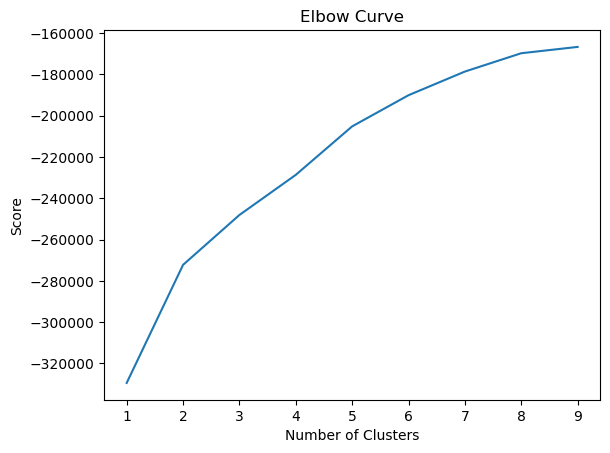

In [216]:
# Plot the elbow curve using PyLab
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

In [217]:
# Calculate inertia for k
inertias = []
K = range(1, 10) 
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertias.append(kmeans.inertia_)

In [218]:
# Calculate percentage drop between each k
percentage_drops = []
for i in range(1, len(inertias)):
    drop = (inertias[i - 1] - inertias[i]) / inertias[i - 1] * 100
    percentage_drops.append(drop)

In [219]:
# Print the drops
for i, drop in enumerate(percentage_drops, start=2):
    print(f"k = {i}: {drop:.2f}% drop from previous")

k = 2: 17.36% drop from previous
k = 3: 10.86% drop from previous
k = 4: 8.44% drop from previous
k = 5: 7.36% drop from previous
k = 6: 6.15% drop from previous
k = 7: 7.53% drop from previous
k = 8: 3.06% drop from previous
k = 9: 5.01% drop from previous


##### **To determine the optimal number of clusters for k-means, I evaluated the inertia using the elbow method and calculated the percentage drop in inertia between successive cluster counts. While the inertia decreased consistently, the most significant improvements occurred between k=2 and k=4, after which the rate of decrease slowed notably. At k=4, the percentage drop in inertia was 8.44%, and further increases in k yielded diminishing returns (e.g. 7.36% at k=5 and only 3.06% at k=8). Based on this point of diminishing returns and the goal of balancing simplicity with cluster quality, I selected k=4 as the most appropriate number of clusters for this dataset.**

#### 03. k-Means Clustering

In [220]:
# Create the k-means object
kmeans = KMeans(n_clusters = 4) 

In [221]:
# Fit the k-means object to the data
kmeans.fit(df_scaled)

KMeans(n_clusters=4)

In [222]:
# Create a column in the DF with values corresponding to which cluster every observation belongs
df_scaled['clusters'] = kmeans.fit_predict(df_scaled)

In [223]:
# Check data
df_scaled.head()

,start_hour,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,trip_duration,age,clusters
0,0.787259,1.036787,-0.021117,0.430370,-0.469082,0.494011,0.901683,0
1,0.787259,-0.749662,-0.910643,-0.279314,0.342812,-0.400233,-0.679394,3
2,0.991765,1.316684,-0.010979,1.744450,0.222553,-0.877742,-1.311825,2
3,-0.644283,0.453847,1.345119,1.122619,1.924733,-0.443643,-1.206420,2
4,1.605283,-0.197910,0.028354,-0.391117,0.610775,-0.734489,-0.995610,2


In [224]:
# Check shape
df_scaled.shape

(47063, 8)

In [225]:
# Check how many values fall into each cluster
df_scaled['clusters'].value_counts()

clusters
2    16490
3    15773
0     9513
1     5287
Name: count, dtype: int64

In [226]:
# Copy labels back to the unscaled df
df['clusters'] = df_scaled['clusters']

# Export the updated DataFrame to CSV
df.to_csv('citi_bike_with_clusters.csv', index=False)

In [227]:
# check directory
print(os.getcwd())

/Users/yaseminmustafa/Desktop/CareerFoundry/Exercise 6/6.5


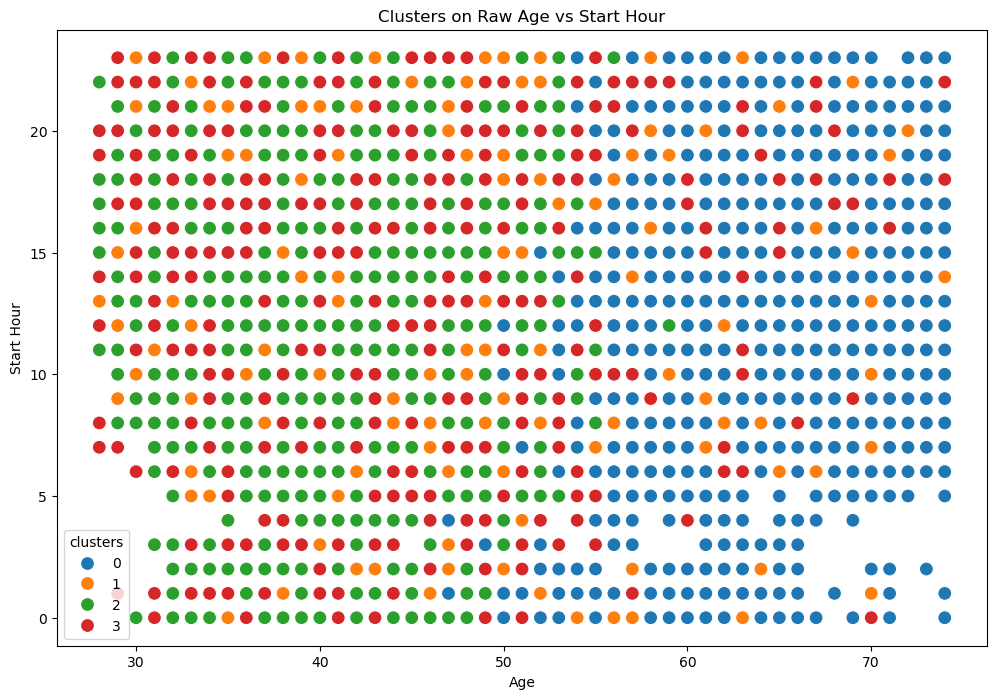

In [228]:
# Plot the clusters for the "age" and "start_hour" variables
plt.figure(figsize=(12,8))
sns.scatterplot(
    x = df['age'],
    y = df['start_hour'],
    hue = df['clusters'],
    palette = 'tab10',
    s = 100
)
plt.xlabel('Age')
plt.ylabel('Start Hour')
plt.title('Clusters on Raw Age vs Start Hour')
plt.show()

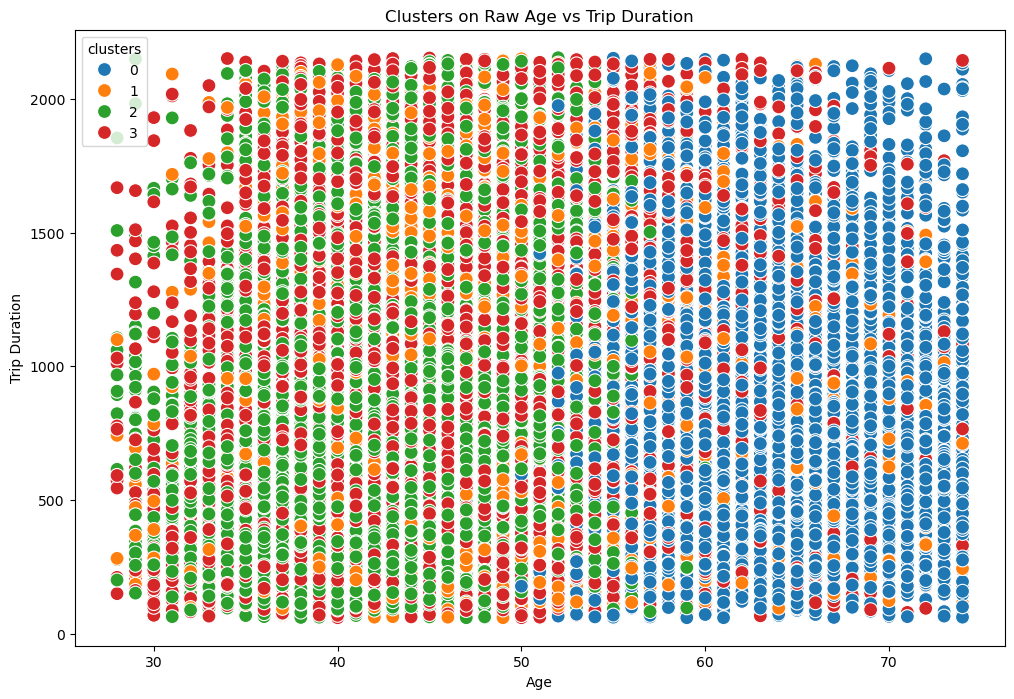

In [229]:
# Plot the clusters for the "age" and "trip_duration" variables
plt.figure(figsize=(12,8))
sns.scatterplot(
    x = df['age'],
    y = df['trip_duration'],
    hue = df['clusters'],
    palette = 'tab10',
    s = 100
)
plt.xlabel('Age')
plt.ylabel('Trip Duration')
plt.title('Clusters on Raw Age vs Trip Duration')
plt.show()

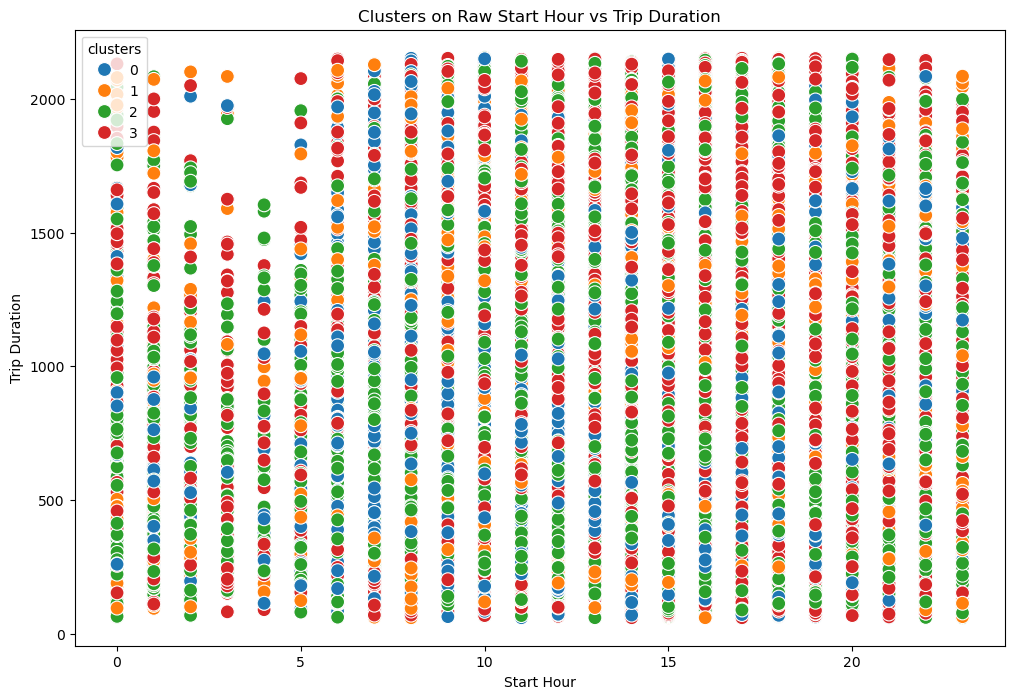

In [230]:
# Plot the clusters for the "start_hour" and "trip_duration" variables
plt.figure(figsize=(12,8))
sns.scatterplot(
    x = df['start_hour'],
    y = df['trip_duration'],
    hue = df['clusters'],
    palette = 'tab10',
    s = 100
)
plt.xlabel('Start Hour')
plt.ylabel('Trip Duration')
plt.title('Clusters on Raw Start Hour vs Trip Duration')
plt.show()

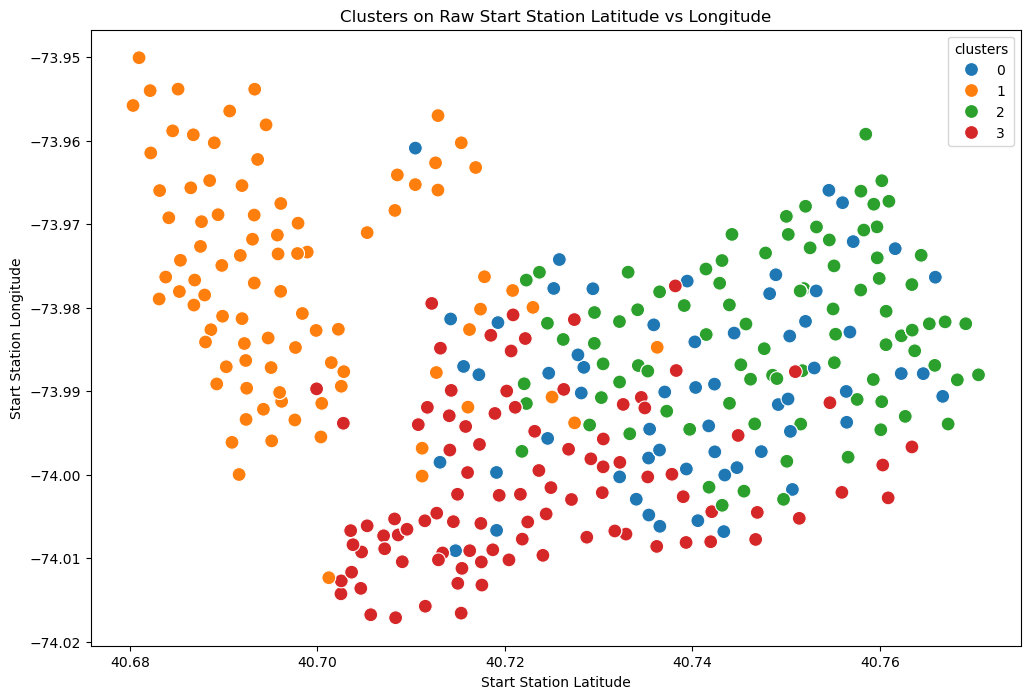

In [231]:
# Plot the clusters for the "start_station_latitude" and "start_station_longitude" variables
plt.figure(figsize=(12,8))
sns.scatterplot(
    x = df['start_station_latitude'],
    y = df['start_station_longitude'],
    hue = df['clusters'],
    palette = 'tab10',
    s = 100
)
plt.xlabel('Start Station Latitude')
plt.ylabel('Start Station Longitude')
plt.title('Clusters on Raw Start Station Latitude vs Longitude')
plt.show()

##### **Upon reviewing the scatterplots, some clear insights and limitations are evident.**
##### **1. Age vs Start Hour**
##### **Upon reviewing the scatterplots, no clear cluster structure emerges between age and start hour, as cluster colours are scattered randomly, indicating these features likely have little influence on cluster formation. However, cluster 1 tends to be more concentrated on the top left side, while cluster 0 appears more on the bottom right, suggesting some subtle grouping despite the overall lack of clear separation.**
##### **2. Age vs Trip Duration**
##### **There is no clear structure or grouping visible across the clusters in this plot. Cluster colours are scattered randomly throughout, suggesting that age and trip duration do not strongly influence cluster formation. This indicates that these two features likely contribute little to the separation of clusters and may not hold a meaningful relationship in this context. However, it can be observed that cluster 1 tends to appear more on the left side, while cluster 0 is more more concentrated on the right, hinting at some subtle variation despite the overall randomness.**
##### **3. Start Hour vs Trip Duration**
##### **There is no clear structure or grouping visible across the clusters in this plot. Cluster colours are scattered randomly throughout, suggesting that start hour and trip duration do not strongly influence cluster formation. This indicates that these two features likely contribute little to the separation of clusters and may not hold a meaningful relationship in this context. However, cluster 0 appears more prevalent on the left side, while cluster 1 tends to be more common on the right, suggesting some subtle pattern despite the overall lack of clear grouping.**
##### **4. Start Station Latitude vs Longitude**
##### **This spatial plot shows clusters distributed across the map without a clear geographical pattern. While points appear to be regionally grouped, the cluster colours don’t correspond meaningfully to specific areas. This suggests that location is not a strong separator in the clustering result — or that geographical coordinates alone are not sufficient to define distinct behavioural groups. However, cluster 3, represented by red dots, does appear to be grouped together on the left side, while all other cluster colours are scattered randomly from the middle to the right with no clear pattern.**

##### **The clustering does not reveal strong separation along most feature dimensions. Upon reviewing the scatterplots, features such as age, start hour, and trip duration show no clear cluster structure — cluster colours are scattered without distinct groupings, indicating these variables contribute little to cluster formation. However, subtle patterns emerge, such as cluster 1 tending to concentrate on one side of certain plots, hinting at weak relationships. Similarly, the spatial distribution of clusters (based on latitude and longitude) shows no definitive geographical patterns. Although some regional groupings of data points exist, cluster labels do not consistently align with specific locations. These findings suggest that no single feature strongly drives the clustering, highlighting limitations in the current model and indicating the need for further exploration — such as engineering new features or applying alternative clustering methods.**

In [232]:
# Assign colour labels to each cluster based on the value in the 'clusters' column
df_scaled.loc[df_scaled['clusters'] == 3, 'cluster'] = 'red'
df_scaled.loc[df_scaled['clusters'] == 2, 'cluster'] = 'green'
df_scaled.loc[df_scaled['clusters'] == 1, 'cluster'] = 'orange'
df_scaled.loc[df_scaled['clusters'] == 0, 'cluster'] = 'blue'

In [233]:
# Group the DF by the 'cluster' column and calculate the mean and median 
# For selected numerical columns ('age', 'start_hour', 'trip_duration, start_station_latitude, start_station_longitude') 
# Within each cluster group
df_scaled.groupby('cluster').agg({'age': ['mean', 'median'], 
                           'start_hour': ['mean', 'median'], 
                           'trip_duration': ['mean', 'median'],
                           'start_station_latitude': ['mean', 'median'],
                           'start_station_longitude': ['mean', 'median']})


age           start_hour           trip_duration            \
             mean    median       mean    median          mean    median   
cluster                                                                    
blue     1.414770  1.428709  -0.196017 -0.235271     -0.147243 -0.380698   
green   -0.519490 -0.468584  -0.001398  0.173741     -0.056305 -0.287367   
orange  -0.143098 -0.152369   0.035650  0.173741      0.070444 -0.254810   
red     -0.262204 -0.152369   0.107733  0.378247      0.124057 -0.118068   

        start_station_latitude           start_station_longitude            
                          mean    median                    mean    median  
cluster                                                                     
blue                  0.406337  0.453847                0.085418  0.033816  
green                 0.652371  0.726973                0.487025  0.511752  
orange               -1.502220 -1.708042                0.805798  0.673639  
red                  -0.423561 -0.482006               -0.830779 -0.923917

##### **Despite the scatterplots showing limited visual separation between clusters — with overlapping or dispersed points across variables like age, start hour, and location — the clustering results still provide useful insights. K-means operates in a multidimensional feature space, so meaningful patterns may exist beyond what simple 2D visuals reveal. The summary statistics by cluster highlight notable differences, especially in trip duration, where both mean and median values vary across groups. This suggests distinct usage patterns, such as short utilitarian rides versus longer recreational trips. In contrast, features like age and start hour show less variation across clusters, indicating they contribute less to segmentation. The differences observed in spatial features (start station latitude and longitude) also hint at some geographic distinctions between clusters. These findings suggest the algorithm is capturing meaningful behavioural and temporal differences in user engagement. These cluster groupings can be valuable for next steps, such as building user personas, optimising bike distribution, or enhancing predictive models by including cluster labels as features.**